Avant propos : Ce DM a été réalisé avec Python 3 

# Exercice 1

In [1]:
# Import des librairies nécessaires

%matplotlib inline

from scipy.stats import beta
from scipy.stats import t
import sklearn.linear_model as lm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import urllib.request
from os import path
import time

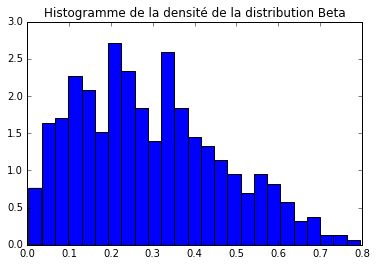

In [60]:
##############################################
# Question 1
##############################################

# Définition de la distribution Beta
np.random.seed(1)
n = 500
alpha = 2
beta = 5
X_vecteur_beta = np.random.beta(alpha, beta, n)

# Affichage de la densité de la distribution Beta
plt.hist(X_vecteur_beta, bins=25, normed=True, color="blue")
plt.title("Histogramme de la densité de la distribution Beta")
plt.show()

In [61]:
##############################################
# Question 2
##############################################

# Définition d'une matrice de 500 lignes et deux colonnes
n1000 = 1000
alpha = 2
beta = 5
X_1000_beta = np.random.beta(alpha, beta, n1000)
X_matrice_beta = X_1000_beta.reshape(500, 2)

mean_matrice_beta = np.mean(X_matrice_beta, axis=0)

print("Le premier vecteur a comme moyenne : " + str(mean_matrice_beta[0]))
print("Le second vecteur a comme moyenne : " + str(mean_matrice_beta[1]))

Le premier vecteur a comme moyenne : 0.284904543332
Le second vecteur a comme moyenne : 0.284987774563


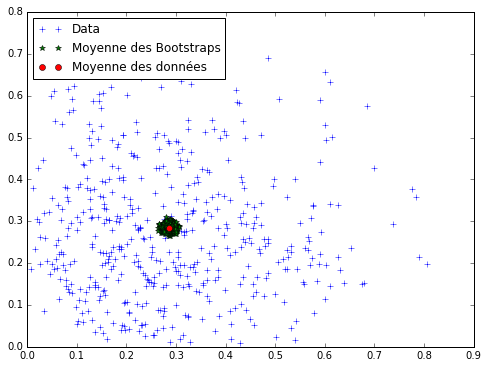

In [62]:
##############################################
# Question 3
##############################################

# Définion de la matrice qui stocke les moyennes calculées pour chaque Bootstrap
B = 500
Xstarbarmem = np.zeros([1, 2 * B]).reshape((B, 2))

# Calcul de la moyenne pour les 500 Bootstraps
for i in range(B):
    Xstar = X_matrice_beta[np.random.randint(len(X_matrice_beta), size=len(X_matrice_beta)), :]
    Xstarbarmem[i, :] = np.mean(Xstar, axis=0)

# Affichage sur le graphe des données, de la moyenne, et des moyennes des boostraps
fig = plt.figure(figsize=(8, 6))
plt.plot(X_matrice_beta[:, 0], X_matrice_beta[:, 1], '+', label="Data")
plt.plot(Xstarbarmem[:, 0], Xstarbarmem[:, 1], '*', label="Moyenne des Bootstraps", color="g")
plt.plot(mean_matrice_beta[0], mean_matrice_beta[0], 'o', label="Moyenne des données", color="r")
plt.legend(loc='upper left')
plt.show()

In [63]:
##############################################
# Question 4
##############################################

# Partie sur l'estimateur Bootstrap
# Calcul du bias de l'estimateur bootstrap de la moyenne
X_boot_bias0 = sum(Xstarbarmem[:, 0] - mean_matrice_beta[0]) / B
X_boot_bias1 = sum(Xstarbarmem[:, 1] - mean_matrice_beta[1]) / B

print("L'estimation bootstrat du bias pour le premier vecteur est : " + str(X_boot_bias0))
print("L'estimation bootstrat du bias pour le second vecteur est : " + str(X_boot_bias1))

# Calcul de la variance de l'estimateur bootstrap de la moyenne
X_boot_cov = np.cov(Xstarbarmem[:, 0], Xstarbarmem[:, 1], bias=False)
print("L'estimation bootstrat de la variance pour le premier vecteur est : " + str(X_boot_cov[0, 0]))
print("L'estimation bootstrat de la variance pour le second vecteur est : " + str(X_boot_cov[1, 1]))

L'estimation bootstrat du bias pour le premier vecteur est : -7.50449719914e-05
L'estimation bootstrat du bias pour le second vecteur est : 0.000865955723497
L'estimation bootstrat de la variance pour le premier vecteur est : 4.90271701399e-05
L'estimation bootstrat de la variance pour le second vecteur est : 5.79067854452e-05


In [64]:
# Partie sur l'estimateur jackknife

# Définion de la matrice qui stocke les moyennes calculées pour chaque Jaccknife
Xjackbarmem = np.zeros([1, 1000]).reshape((500, 2))

# Calcul de la moyenne pour les 500 Jackknife
for i in range(500):
    Xjack = np.delete(X_matrice_beta, i, 0)
    Xjackbarmem[i, :] = np.mean(Xjack, axis=0)

# Calcul du bias de l'estimateur jackknife de la moyenne
X_jack_bias0 = sum(Xjackbarmem[:, 0] - mean_matrice_beta[0]) * (n - 1) / n
X_jack_bias1 = sum(Xjackbarmem[:, 1] - mean_matrice_beta[1]) * (n - 1) / n

print("L'estimation jaccknife du bias pour le premier vecteur est : " + str(X_jack_bias0))
print("L'estimation jaccknife du bias pour le second vecteur est : " + str(X_jack_bias1))

# Calcul de la variance de l'estimateur jackknife de la moyenne
X_jack_cov = (n - 1) * np.cov(Xjackbarmem[:, 0], Xjackbarmem[:, 1], bias=True)
print("L'estimation jaccknife de la variance pour le premier vecteur est : " + str(X_jack_cov[0, 0]))
print("L'estimation jaccknife de la variance pour le second vecteur est : " + str(X_jack_cov[1, 1]))

L'estimation jaccknife du bias pour le premier vecteur est : -8.86402062861e-16
L'estimation jaccknife du bias pour le second vecteur est : 5.59541302181e-15
L'estimation jaccknife de la variance pour le premier vecteur est : 5.41829330663e-05
L'estimation jaccknife de la variance pour le second vecteur est : 5.5269628068e-05


In [65]:
# Cacul de la variance empirique des données et comparaison avec la formule demandée
X_var0 = np.var(X_matrice_beta[:, 0], ddof=1)
X_var1 = np.var(X_matrice_beta[:, 1], ddof=1)

print("Les deux valeurs pour la première variance sont-elles identiques ? " + str(
        np.isclose(X_jack_cov[0, 0], X_var0 / n)))
print("Les deux valeurs pour la seconde variance sont-elles identiques ? " + str(
        np.isclose(X_jack_cov[1, 1], X_var1 / n)))

Les deux valeurs pour la première variance sont-elles identiques ? True
Les deux valeurs pour la seconde variance sont-elles identiques ? True


In [66]:
##############################################
# Question 5
##############################################

# Calcul de la vraie variance de l'estimateur de la moyenne
X_vraie_variance = (1 / n) * (alpha * beta) / ((alpha + beta + 1) * (alpha + beta) ** 2)
X_vraie_cov = np.array([[X_vraie_variance, 0], [0, X_vraie_variance]])
print("La vraie variance de l'estimateur de la moyenne est : {}".format(X_vraie_cov))

# Calcul de la variance asymptotique
X_asymp_cov = np.cov(X_matrice_beta[:, 0], X_matrice_beta[:, 1], bias=False) / 500
print("La variance asymptotique est : {}".format(X_vraie_cov))

La vraie variance de l'estimateur de la moyenne est : [[  5.10204082e-05   0.00000000e+00]
 [  0.00000000e+00   5.10204082e-05]]
La variance asymptotique est : [[  5.10204082e-05   0.00000000e+00]
 [  0.00000000e+00   5.10204082e-05]]


In [67]:
# Fonction qui calcule la distance entre une variance et la "vraie variance"
def compute_distance_to_true_cov(X_cov):
    return np.abs(X_cov[0, 0] - X_vraie_cov[0, 0]) + np.abs(X_cov[1, 1] - X_vraie_cov[1, 1]) + np.abs(
            X_cov[1, 0] - X_vraie_cov[1, 0])


print("La distance entre la variance asymptotique et la vraie variance est de : {}".format(
        compute_distance_to_true_cov(X_asymp_cov)))
print("La distance entre la variance jackknife et la vraie variance est de : {}".format(
        compute_distance_to_true_cov(X_jack_cov)))
print("La distance entre la variance bootstrap et la vraie variance est de : {}".format(
        compute_distance_to_true_cov(X_boot_cov)))

La distance entre la variance asymptotique et la vraie variance est de : 1.0124714638161803e-05
La distance entre la variance jackknife et la vraie variance est de : 1.0124714638160328e-05
La distance entre la variance bootstrap et la vraie variance est de : 1.0435864872899103e-05


# Exercice 2

In [48]:
##############################################
# Question 6
##############################################

# Définition de quelques constantes
n = 300
B = 500
monte_carlo_repetition = 2000

# Il est nécessaire de faire une fonction pour la question 11
def compute_x_matrice(n):
    # Définition de U, X1 et X2
    U = np.random.uniform(-.1, .1, n)
    X1 = np.random.uniform(0, 1, n)
    X2 = X1 + U

    # Contruction de la matrice X
    X = np.array((X1, X2)).T
    return X

X = compute_x_matrice(n)

print("Ci-dessous les premières lignes de la matrice X : \n")
print(X[:10,:])

Ci-dessous les premières lignes de la matrice X : 

[[ 0.51796437  0.47360257]
 [ 0.28309682  0.2469032 ]
 [ 0.58022397  0.63383033]
 [ 0.27250659  0.29822315]
 [ 0.37328359  0.43131055]
 [ 0.17466748  0.09820457]
 [ 0.62439413  0.65296784]
 [ 0.87428895  0.81019088]
 [ 0.62284368  0.61603937]
 [ 0.82993658  0.89311718]]


In [49]:
##############################################
# Question 7
##############################################

Calcul de la vraie corrélation :
    
Quand on prend la définition de la corrélation, on se rend compte après simplification que le numérateur
qui est la covarance est en fait égal à la variance de X1. Les simplications proviennent notamment du fait que :
- X2 = X1 + U
- Et que X1 et U sont indépendants

On trouve alors :

$corr(X_{1}, X_{2}) = \frac{varX_{1}}{\sqrt{var(X_{1})}*\sqrt{var(X_{1})+var(U)}}$

La variance de la loi uniforme continue est connue et à comme valeur :

$var(X) = \frac{(b - a)^{2}}{12}$

En remplaçant pour X1 et U les valeurs de 'a' et 'b' respectives on trouve alors que :

$corr(X_{1},X_{2}) = \frac{5}{\sqrt{26}}$

In [50]:
corr_relle = 5 / (np.sqrt(26))
print("La valeur du vrai coefficient de corrélation est de : {}".format(corr_relle))


# Il est nécessaire de faire une fonction pour la question 11
def compute_corr_estim(x):
    # Calcul d'un estimateur de la corrélation en se basant sur les données tirées
    corr_estim = np.corrcoef(x[:, 0], x[:, 1])
    return corr_estim

corr_estim = compute_corr_estim(X)

print("La valeur de l'estimateur du coefficient de corrélation est de {}".format(corr_estim[0, 1]))

La valeur du vrai coefficient de corrélation est de : 0.9805806756909202
La valeur de l'estimateur du coefficient de corrélation est de 0.9808022889259956


In [51]:
#############################################
# Question 8
##############################################

# Calcul de l'intervalle de confiance du basique Bootstrap

# Il est nécessaire de faire des fonctions pour la question 11

def compute_bootstrap_corr(x):
    # Définion de la matrice qui stocke les moyennes calculées pour chaque Bootstrap
    xboot_corr = np.zeros([1, B]).T

    # Calcul de la corrélation pour les 500 Bootstraps
    for i in range(B):
        xboot = x[np.random.randint(len(x), size=len(x)), :]
        xboot_corr[i, 0] = np.corrcoef(xboot[:, 0], xboot[:, 1])[0, 1]

    return xboot_corr


def compute_intervalle_basic_boot(xboot_corr, corr_estim, b):
    # 1-ère étape pour construire l'intervalle de confiance :
    # Calculer pour chaque corrélation issue de Bootstrap la valeur sqrt(n)*(boot_coor - corr_estim)

    x_delta_boot_estim = (xboot_corr - corr_estim[0, 1]) * np.sqrt(n)

    # Calcul des quantiles 1-alpha/2 et alpha/2
    boot_quantile_basic_max = np.percentile(x_delta_boot_estim, 2.5)
    boot_quantile_basic_min = np.percentile(x_delta_boot_estim, 97.5)

    # On peut maintenant déterminer l'intervalle de confiance
    intervalle_boot_basic_max = corr_estim[0, 1] - boot_quantile_basic_max / np.sqrt(n)
    intervalle_boot_basic_min = corr_estim[0, 1] - boot_quantile_basic_min / np.sqrt(n)

    return (intervalle_boot_basic_min, intervalle_boot_basic_max)

In [52]:
# Utilisation des fonctions précédentes pour calculer l'intervalle
Xboot_corr = compute_bootstrap_corr(X)
intervalle_boot_basic = compute_intervalle_basic_boot(Xboot_corr, corr_estim, B)
print("L'intervalle de confiance du bootstrap basique est [{} , {}] ".format(intervalle_boot_basic[0],
                                                                              intervalle_boot_basic[1]))

L'intervalle de confiance du bootstrap basique est [0.9780591324119436 , 0.983895946621879] 


In [53]:
##############################################
# Question 9
##############################################

# Il est nécessaire de faire une fonction pour la question 11

def compute_intervalle_perc(xboot_corr, b):
    # Il suffit de reprendre notre vecteur contenant les corrélations de chaque bootstrap
    intervalle_boot_perc_max = np.percentile(xboot_corr, 97.5)
    intervalle_boot_perc_min = np.percentile(xboot_corr, 2.5)

    return (intervalle_boot_perc_min, intervalle_boot_perc_max)

intervalle_boot_perc = compute_intervalle_perc(Xboot_corr, B)
print("L'intervalle de confiance du bootstrap percentile est [{} , {}] ".format(intervalle_boot_perc[0],
                                                                                 intervalle_boot_perc[1]))

L'intervalle de confiance du bootstrap percentile est [0.9777086312301123 , 0.9835454454400476] 


In [54]:
##############################################
# Question 10
##############################################

# Il est nécessaire de faire une fonction pour la question 11

def compute_intervalle_asympt(x, corr_estim, n):
    # La première étape est de calculé la variance avec la technique du couteau de Jack
    # Définion du vecteur qui stocke les corrélations calculées pour chaque Jaccknife

    xjack_corr = np.zeros([1, n]).T

    # Calcul de la correlation pour les 300 Jackknife
    for i in range(n):
        xjack = np.delete(x, i, 0)
        xjack_corr[i, 0] = np.corrcoef(xjack[:, 0], xjack[:, 1])[0, 1]

    # Calcul pour chaque jackknife de la quantité qui doit tendre vers une loi normale

    xnormal = (xjack_corr[:, 0] - corr_estim[0, 1]) * np.sqrt(n)

    # Calcul de la variance de l'estimateur jackknife de la moyenne
    var_estim = np.var(xnormal, ddof=1)

    # On peut désormais calculer l'intervalle de confiance suivant la formule
    intervalle_asympt_max = corr_estim[0, 1] + np.sqrt(var_estim) * 1.96 / np.sqrt(n)
    intervalle_asympt_min = corr_estim[0, 1] - np.sqrt(var_estim) * 1.96 / np.sqrt(n)

    return (intervalle_asympt_min, intervalle_asympt_max)


intervalle_asympt = compute_intervalle_asympt(X, corr_estim, n)
print("L'intervalle de confiance asymptotique est [{} , {}] ".format(intervalle_asympt[0], intervalle_asympt[1]))

L'intervalle de confiance asymptotique est [0.9806388062686001 , 0.9809657715833912] 


In [55]:
##############################################
# Question 11
##############################################

# Il est nécessaire de faire une fonction pour la question 12

# Cette fonction permet pour chaque méthonde de calculer l'intervalle de confiance
# Elle retourne un tuple avec le résultat pour chaque métdone
def compute_precision_intervalles(n, b):
    nbr_succes_basic = 0
    nbr_succes_perc = 0
    nbr_succes_asympt = 0

    for i in range(monte_carlo_repetition):
        X_monte_carlo = compute_x_matrice(n)
        corr_estim_monte_carlo = compute_corr_estim(X_monte_carlo)
        Xboot_corr_monte_carlo = compute_bootstrap_corr(X_monte_carlo)

        intervalle_boot_basic_monte_carlo = compute_intervalle_basic_boot(Xboot_corr_monte_carlo, corr_estim_monte_carlo, b)
        if (corr_relle >= intervalle_boot_basic_monte_carlo[0] and corr_relle <= intervalle_boot_basic_monte_carlo[1]):
            nbr_succes_basic += 1

        intervalle_boot_perc_monte_carlo = compute_intervalle_perc(Xboot_corr_monte_carlo, b)
        if (corr_relle >= intervalle_boot_perc_monte_carlo[0] and corr_relle <= intervalle_boot_perc_monte_carlo[1]):
            nbr_succes_perc += 1

        intervalle_asympt_monte_carlo = compute_intervalle_asympt(X_monte_carlo, corr_estim_monte_carlo, n)
        if (corr_relle >= intervalle_asympt_monte_carlo[0] and corr_relle <= intervalle_asympt_monte_carlo[1]):
            nbr_succes_asympt += 1

    return (100 * nbr_succes_basic / monte_carlo_repetition, 100 * nbr_succes_perc / monte_carlo_repetition,
            100 * nbr_succes_asympt / monte_carlo_repetition)


precision = compute_precision_intervalles(n, B)

print("La précision de l'intervalle basique est de {} %".format(precision[0]))
print("La précision de l'intervalle percentile est de {} %".format(precision[1]))
print("La précision de l'intervalle asymptotique est de {} %".format(precision[2]))

La précision de l'intervalle basique est de 93.95 %
La précision de l'intervalle percentile est de 94.65 %
La précision de l'intervalle asymptotique est de 9.4 %


In [56]:
##############################################
# Question 12
##############################################

# Calcul de la précision avec différents nombres de sample
cas30 = compute_precision_intervalles(30, B)
cas50 = compute_precision_intervalles(50, B)
cas100 = compute_precision_intervalles(100, B)
cas300 = compute_precision_intervalles(300, B)

# Transformation en liste des résultats obtenus pour chaque cas afin de faciliter l'affichage de l'histogramme
precision_intervalle_boot_basic = []
precision_intervalle_boot_perc = []
precision_intervalle_asympt = []

for cas in (cas30, cas50, cas100, cas300):
    precision_intervalle_boot_basic.append(cas[0])
    precision_intervalle_boot_perc.append(cas[1])
    precision_intervalle_asympt.append(cas[2])

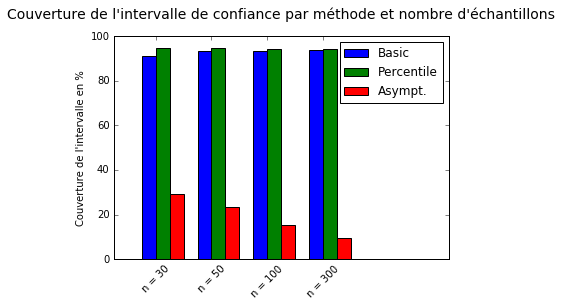

In [57]:
# Affichage de l'histogramme

# Données nécessaires à l'histogramme (nombre de groupe, et largeur des barres-
groups = np.arange(4)
width = 0.25

fig = plt.figure()
ax = fig.add_subplot(111)

# Définition des différentes barres
rects1 = ax.bar(groups, precision_intervalle_boot_basic, width,
                color='blue')

rects2 = ax.bar(groups + width, precision_intervalle_boot_perc, width,
                color='green')

rects3 = ax.bar(groups + 2 * width, precision_intervalle_asympt, width,
                color='red')

# Définition de l'abscisse
ax.set_xlim(-0.5, 5.5)
ax.set_xticks(groups+width)
xTickMarks = [cas for cas in ("n = 30", "n = 50", "n = 100", "n = 300")]
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

# Définition de l'ordonnée
ax.set_ylabel("Couverture de l'intervalle en %")

# Définition de la légende
ax.legend((rects1[0], rects2[0], rects3[0]), ('Basic', 'Percentile', 'Asympt.'))

# Définition du titre
figure_title = "Couverture de l'intervalle de confiance " \
               "par méthode et nombre d'échantillons"
plt.text(0.5, 1.08, figure_title, horizontalalignment='center', fontsize=14, transform=ax.transAxes)

plt.show()

# Exercice 3

In [69]:
##############################################
# Question 13
##############################################

url_file = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/"
filename = "auto-mpg.data-original"

Location = url_file + filename

# Vérification que le fichier existe dans le répertoire courant, sinon import de ce dernier
if not (path.isfile(filename + ".csv")):
    urllib.request.urlretrieve(Location, filename + ".csv")

fields = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin',
          'car name']
na_values = ['NA']

# Contruction de la dataframe
df = pd.read_csv(filename + ".csv", sep=r"\s+", names=fields, header=None, na_values=na_values)

# Détection des valeurs manquantes
null_data = df[df.isnull().any(axis=1)]

# Contruction de la dataframe sans valeurs non définies
df_sans_lignes_vides = df.copy().dropna(axis=0, how="any")

float_fields = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

for field in float_fields:
    df_sans_lignes_vides[field] = df_sans_lignes_vides[field].apply(lambda i: float(i))

# Definition du vecteur Y et de la martice X
df_Y = df_sans_lignes_vides['mpg']
df_X = df_sans_lignes_vides[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]

In [71]:
# Calcul de l'estimateur des moindres carrés
skl_linmod = lm.LinearRegression(fit_intercept=True)
skl_linmod.fit(df_X, df_Y)

# Calcul de théta
theta = [skl_linmod.intercept_]

for coef in skl_linmod.coef_:
    theta.append(coef)
print("Voici les valeurs de theta, la première valeur correspondant à theta zéro : {}".format(theta))

Voici les valeurs de theta, la première valeur correspondant à theta zéro : [-14.53525048050609, -0.32985908907395589, 0.0076784302439189076, -0.00039135557376078598, -0.0067946179133750364, 0.085273246947229722, 0.75336717975010192]


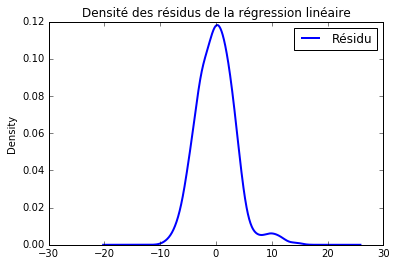

In [72]:
# Calcul des residus
Y_predi = skl_linmod.predict(df_X)
df_residu = df_Y - Y_predi

# Graphique représentant la densité des résidus
fig = plt.figure()
df_residu.plot.kde(label='Résidu', legend=True, color='blue', title="Densité des résidus de la régression linéaire", linewidth=2)
plt.show()

In [74]:
##############################################
# Question 14
##############################################

# Pour calculer l'intervalle de confiance il est nécessaire de connaitre l'écart type des résidus
ecart_type_residus = df_residu.std()

# Il est aussi nécessaire de connaitre le rang de la matrice X
X_rang = np.linalg.matrix_rank(df_X)

# Nous pouvons désormais calculer le nombre de degrés de liberté de la loi de Student
nbr_degres_libertes = len(df_X) - X_rang

# Il nous faut désormais calculer le quantile d'ordre 1-alpha/2 de la loi de student de degré zéro
quantile_student = np.abs(t.ppf(0.975, nbr_degres_libertes))

# Calcul du coefficient de la matrice de gram pour les cylindres
gram_matrix = df_X.T.dot(df_X)
gram_matrix_inverse = np.linalg.inv(gram_matrix)


# Il est nécessaire de faire une fonction pour la question 17
def compute_intervalle_theta(i):
    gram_matrix_cylinder = gram_matrix_inverse[i - 1, i - 1]

    intervalle_min = theta[i] - quantile_student * ecart_type_residus * np.sqrt(gram_matrix_cylinder)
    intervalle_max = theta[i] + quantile_student * ecart_type_residus * np.sqrt(gram_matrix_cylinder)
    return (intervalle_min, intervalle_max)


print("L'intervalle de confiance pour le théta correspondant aux cylindres est : [{}, {}] ".format(
        compute_intervalle_theta(1)[0], compute_intervalle_theta(1)[1]))

L'intervalle de confiance pour le théta correspondant aux cylindres est : [-0.9659589370470585, 0.3062407588991467] 


In [75]:
##############################################
# Question 15
##############################################

# Définition du nombre de bootstratp et du nombre d'observations
B = 200
n = df_X.shape[0]

# Définion de la matrice qui stocke les résidus pour chaque Bootstrap
Xboot_res = np.zeros([n, B])
array_residu = np.array(df_residu)

# Définition de la matrice contenant chaque Y prédit via la méthode Bootstrap
Yboot = np.zeros([n, B])

# Définition du modèle en prévision de calculer les thetas issus de la méthode Bootstrap
skl_linmod_boot = lm.LinearRegression(fit_intercept=True)

# Définition de la matrice contenant chaque vecteur theta obtenu par chaque Bootstrap
theta_boot = np.zeros([B, df_X.shape[1] + 1])

# Pour tracer le graphe demandé il est nécessaire de calculer XiT*thétat_chapeau, qui nous servira d'abscisse
estimated_response = df_X.dot(theta[1:])

for i in range(B):
    # Génération de n vecteurs de résidus alimenté par tirage uniforme avec remise à partir des résidus calculés précédemment
    X_res = array_residu[np.random.randint(n, size=n)]

    # Calcul des vecteurs Y issus de bootstrap
    Xboot_res[:, i] = X_res
    Yboot[:, i] = Y_predi + X_res

    # Puis calcul des vecteurs thétas issus de bootstratp
    skl_linmod_boot.fit(df_X, Yboot[:, i])
    theta_boot[i, 0] = skl_linmod_boot.intercept_
    for j, coef in enumerate(skl_linmod_boot.coef_):
        theta_boot[i, j + 1] = coef

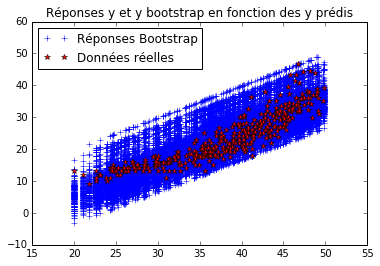

In [78]:
# Construction du graphique (la condition est nécessaire pour n'afficher qu'un label pour les réponses bootstrap

fig = plt.figure()
for i in range(B):
    if i == 0:
        plt.plot(estimated_response, Yboot[:, i], '+', label="Réponses Bootstrap", color="blue")

    else:
        plt.plot(estimated_response, Yboot[:, i], '+', color="blue")

plt.plot(estimated_response, df_Y, '*', label="Données réelles", color="red")

plt.ylim(-10, 60)
plt.xlim(15, 55)
plt.legend(loc="upper left")
plt.title("Réponses y et y bootstrap en fonction des y prédis")
plt.show()

In [79]:
##############################################
# Question 16
##############################################

# Il est nécessaire de faire une fonction pour la question 17

def compute_intervalle_basic_boot(i):
    # 1-ère étape pour construire l'intervalle de confiance :
    # Calculer pour chaque corrélation issue de Bootstrap la valeur sqrt(n)*(boot_coor - corr_estim)

    x_delta_boot_estim = (theta_boot[:, i] - theta[i]) * np.sqrt(n)

    # Calcul des quantiles 1-alpha/2 et alpha/2

    boot_quantile_basic_min = np.percentile(x_delta_boot_estim, 2.5)
    boot_quantile_basic_max = np.percentile(x_delta_boot_estim, 97.5)
    intervalle_boot_basic_max = theta[i] - boot_quantile_basic_min / np.sqrt(n)
    intervalle_boot_basic_min = theta[i] - boot_quantile_basic_max / np.sqrt(n)

    return (intervalle_boot_basic_min, intervalle_boot_basic_max)


print("L'intervalle de confiance pour théta {} (les cylindres) est : {}".format(1, compute_intervalle_basic_boot(1)))

L'intervalle de confiance pour théta 1 (les cylindres) est : (-1.0365966428658542, 0.34871495060627489)


In [80]:
##############################################
# Question 17
##############################################

# Calcul par les deux méthodes des intervalles de confiances pour chaque théta

intervalle_theta = []
intervalle_boot_theta = []
for i in range(1, 7):
    intervalle_theta.append(compute_intervalle_theta(i))
    intervalle_boot_theta.append(compute_intervalle_basic_boot(i))

# Calcul des min et max pour chaque intervalle qui seront utilisés pour
# la représentation graphique
intervalle_theta_min = [x[0] - (x[0] + x[1]) / 2 for x in intervalle_theta]
intervalle_theta_max = [x[1] - (x[0] + x[1]) / 2 for x in intervalle_theta]

intervalle_boot_theta_min = [x[0] - (x[0] + x[1]) / 2 for x in intervalle_boot_theta]
intervalle_boot_theta_max = [x[1] - (x[0] + x[1]) / 2 for x in intervalle_boot_theta]

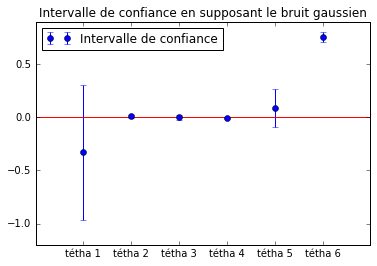

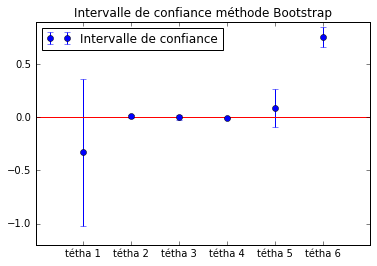

In [82]:
# Affichage des intervalles de confiance en supposant le bruit gaussien
fig2 = plt.figure()
plt.axhline(0, color='red')
plt.errorbar(np.arange(1, 7), theta[1:], yerr=[np.abs(intervalle_theta_min), np.abs(intervalle_theta_max)], fmt='o',
             label='Intervalle de confiance')
plt.xlim(0, 7)
xTickMarks = ["tétha " + str(cas) for cas in range(1, 7)]
plt.xticks(np.arange(1, 7), xTickMarks)
plt.ylim(-1.2, 0.9)
plt.legend(loc='upper left')
plt.title("Intervalle de confiance en supposant le bruit gaussien")
plt.show()

# Affichage des intervalles de confiance par la méthode Bootstrap
fig3 = plt.figure()
plt.axhline(0, color='red')
plt.errorbar(np.arange(1, 7), theta[1:], yerr=[np.abs(intervalle_boot_theta_min), np.abs(intervalle_boot_theta_max)],
             fmt='o', label='Intervalle de confiance')
plt.xlim(0, 7)
xTickMarks = ["tétha " + str(cas) for cas in range(1, 7)]
plt.xticks(np.arange(1, 7), xTickMarks)
plt.ylim(-1.2, 0.9)
plt.legend(loc='upper left')
plt.title("Intervalle de confiance méthode Bootstrap")
plt.show()